In [1]:
from sklearn.datasets import load_iris

In [2]:
import xgboost as xgb
from xgboost import plot_importance

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
iris = load_iris()

X = iris.data
y = iris.target

In [9]:
print(X.shape)

(150, 4)


In [10]:
print(len(y))

150


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [12]:
params = {'booster': 'gbtree',
         'objective': 'multi:softmax',
         'num_class': 3,
         'gamma': 0.1,
         'max_depth': 6,
         'lambda': 2,
         'subsample': 0.7,
         'colsample': 0.7,
         'min_child_weight': 3,
         'silent': 1,
         'eta': 0.1,
         'seed': 1000,
         'nthread': 4}

In [13]:
plst = params.items()
print(plst)

dict_items([('booster', 'gbtree'), ('objective', 'multi:softmax'), ('num_class', 3), ('gamma', 0.1), ('max_depth', 6), ('lambda', 2), ('subsample', 0.7), ('colsample', 0.7), ('min_child_weight', 3), ('silent', 1), ('eta', 0.1), ('seed', 1000), ('nthread', 4)])


In [14]:
dtrain = xgb.DMatrix(X_train, y_train)

In [15]:
num_rounds = 500

In [16]:
model = xgb.train(plst,
                 dtrain,
                 num_rounds)

In [17]:
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

print(ans)

[1. 2. 2. 1. 0. 1. 1. 0. 0. 1. 2. 0. 1. 2. 2. 2. 0. 0. 1. 0. 0. 2. 0. 2.
 0. 0. 0. 2. 2. 0.]


In [18]:
%matplotlib inline

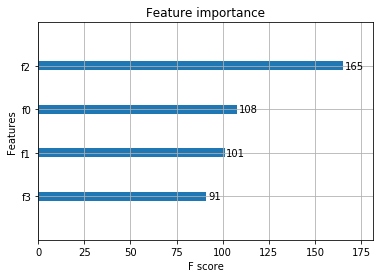

In [19]:
plot_importance(model)

In [20]:
# SKLearn Wrapper for classification

model = xgb.XGBClassifier(max_depth = 5,
                         learning_rate = 0.1,
                         n_estimators = 160,
                         silent = True,
                         objective = 'multi:softmax')

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=160,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
ans = model.predict(X_test)
print(ans)

[1 2 2 1 0 1 1 0 0 1 2 0 1 2 2 2 0 0 1 0 0 2 0 2 0 0 0 2 2 0]


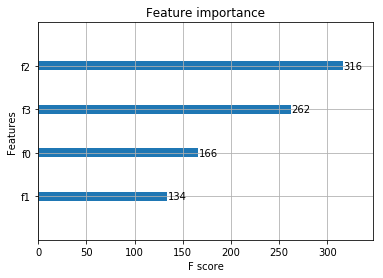

In [22]:
plot_importance(model)